<a href="https://colab.research.google.com/github/trilokdhakad/Calculator/blob/main/iris_dataset_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trilok Dhakad
# 2311201369

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
print(df.head(6))


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa


In [ ]:
print(df.sample(7))

     sepal_length  sepal_width  petal_length  petal_width     species
71            6.1          2.8           4.0          1.3  versicolor
26            5.0          3.4           1.6          0.4      setosa
119           6.0          2.2           5.0          1.5   virginica
144           6.7          3.3           5.7          2.5   virginica
135           7.7          3.0           6.1          2.3   virginica
82            5.8          2.7           3.9          1.2  versicolor
128           6.4          2.8           5.6          2.1   virginica


# Custom colors and fonts

In [ ]:

feature_colors = ['#69A197', '#FF6B6B', '#FFD93D', '#6A0572']  # Uncommon soft-bold blend
species_colors = {'setosa': '#588B8B', 'versicolor': '#FFB5A7', 'virginica': '#A0C4FF'}
font_title = {'fontsize': 13, 'fontweight': 'bold', 'color': '#2F3E46'}
font_labels = {'fontsize': 11, 'color': '#333'}

# Histograms

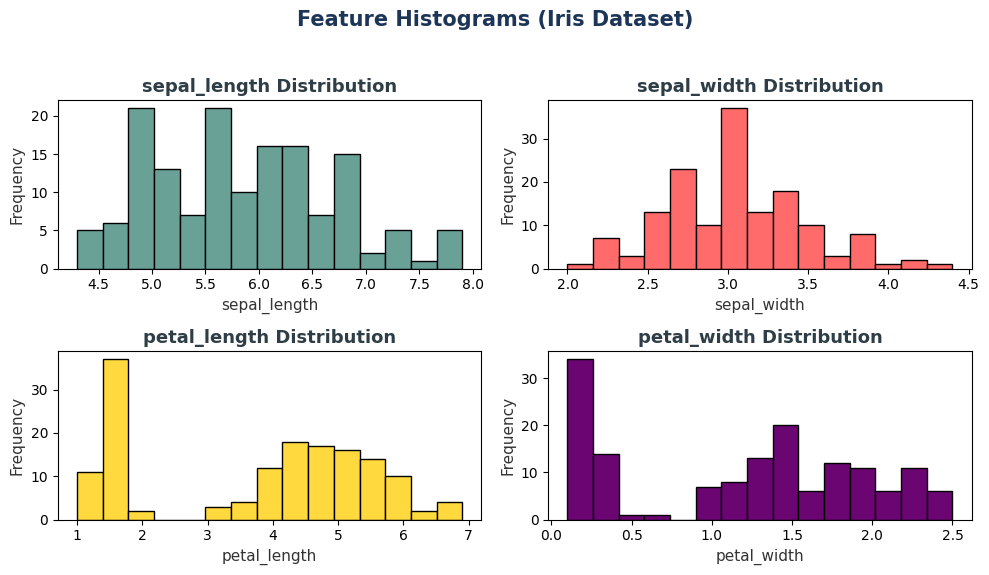

In [ ]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    plt.hist(df[col], bins=15, color=feature_colors[i], edgecolor='black')
    plt.title(f'{col} Distribution', **font_title)
    plt.xlabel(col, **font_labels)
    plt.ylabel('Frequency', **font_labels)
plt.suptitle("Feature Histograms (Iris Dataset)", fontsize=15, fontweight='bold', color="#1D3557")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('histograms.eps')

# Pie chart of species

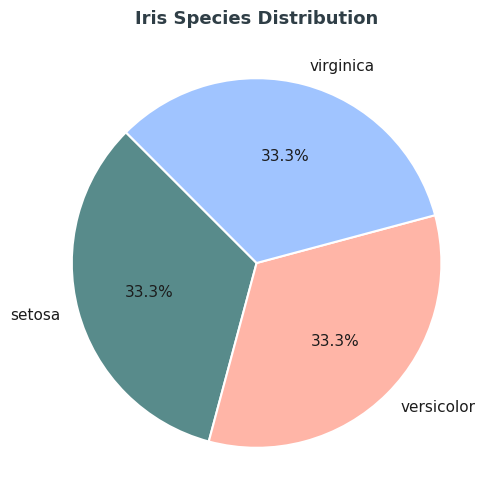

In [ ]:
plt.figure(figsize=(6, 6))
species_counts = df['species'].value_counts()
plt.pie(
    species_counts,
    labels=species_counts.index,
    colors=[species_colors[sp] for sp in species_counts.index],
    autopct='%1.1f%%',
    startangle=135,
    textprops={'fontsize': 11, 'color': '#1c1c1c'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
plt.title('Iris Species Distribution', **font_title)
plt.savefig('pie_species.eps')

# Box Plot

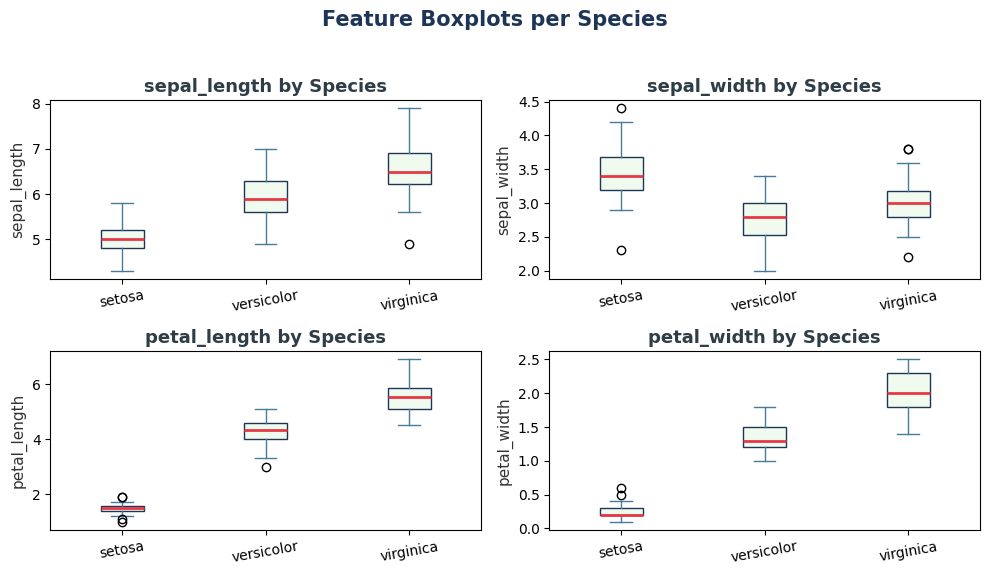

In [ ]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    data = [df[df['species'] == species][col] for species in species_colors]
    plt.boxplot(data, patch_artist=True,
                boxprops=dict(facecolor='#F1FAEE', color='#1D3557'),
                medianprops=dict(color='#E63946', linewidth=2),
                whiskerprops=dict(color='#457B9D'),
                capprops=dict(color='#457B9D'))
    plt.xticks([1, 2, 3], species_colors.keys(), rotation=10)
    plt.title(f'{col} by Species', **font_title)
    plt.ylabel(col, **font_labels)
plt.suptitle("Feature Boxplots per Species", fontsize=15, fontweight='bold', color="#1D3557")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('boxplots.eps')

# Line Chart (avg feature values)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


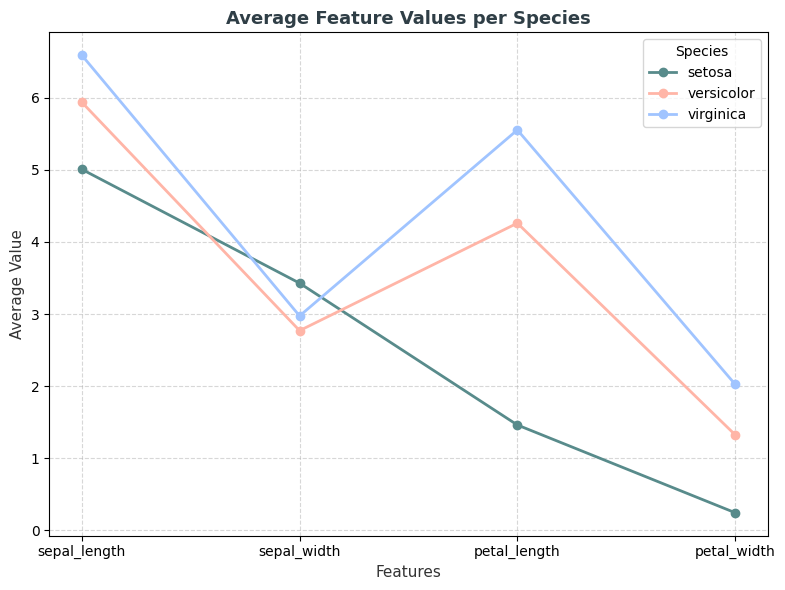

In [ ]:
mean_df = df.groupby('species').mean().T
plt.figure(figsize=(8, 6))
for species in mean_df.columns:
    plt.plot(mean_df.index, mean_df[species],
             marker='o',
             label=species,
             color=species_colors[species],
             linewidth=2)
plt.title("Average Feature Values per Species", **font_title)
plt.xlabel("Features", **font_labels)
plt.ylabel("Average Value", **font_labels)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Species', fontsize=10)
plt.tight_layout()
plt.savefig('linechart_avg.eps')

# Pairwise Scatter Plot

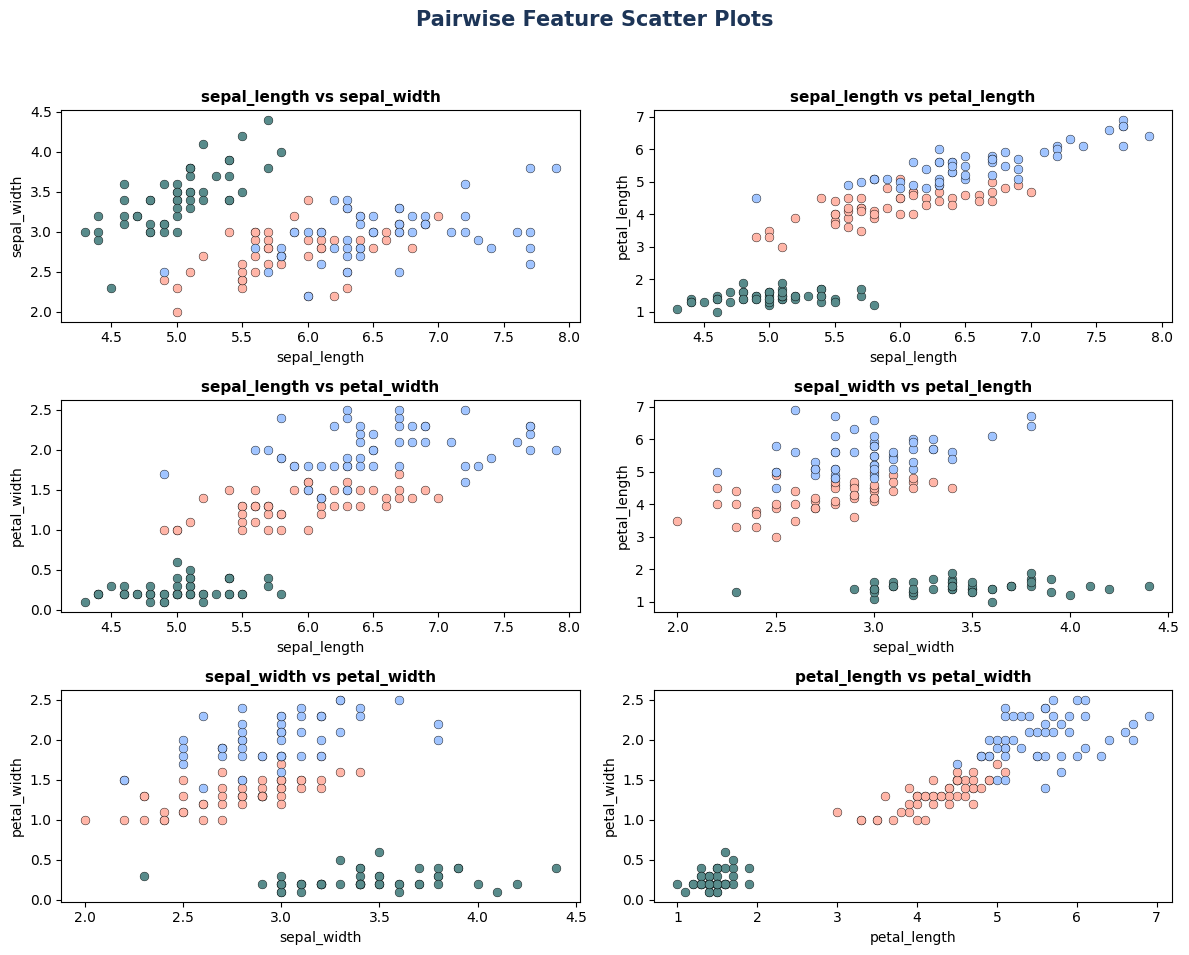

In [ ]:
from itertools import combinations

features = df.columns[:-1]
pairs = list(combinations(features, 2))

plt.figure(figsize=(12, 10))
for i, (x, y) in enumerate(pairs):
    plt.subplot(3, 2, i + 1)
    for species, color in species_colors.items():
        subset = df[df['species'] == species]
        plt.scatter(subset[x], subset[y], label=species if i == 0 else None,
                    s=40, color=color, edgecolors='black', linewidth=0.3)
    plt.xlabel(x, fontsize=10)
    plt.ylabel(y, fontsize=10)
    plt.title(f'{x} vs {y}', fontsize=11, fontweight='bold')

# Add legend only once (in the first subplot)
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 3.0), loc='upper right')

plt.suptitle("Pairwise Feature Scatter Plots", fontsize=15, fontweight='bold', color="#1D3557")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('pairplot.eps')